In [7]:
import zipfile

# Specify the file name and path of the zip file
zip_file_path = 'Gammatonegram.zip'

# Specify the path where you want to extract the contents
extract_to_path = 'Gammatonegram_images/'

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Unzipping completed.")


Unzipping completed.


In [6]:
!pip install tensorflow

In [18]:
tensorflow --version

NameError: name 'tensorflow' is not defined

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [3]:
# Define the data generators with preprocessing steps
train_gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load data
train_data = train_gen.flow_from_directory(
    'Gammatonegram_images/Gammatone of heart sounds/Gammatone of heart sounds/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = test_gen.flow_from_directory(
    'Gammatonegram_images/Gammatone of heart sounds/Gammatone of heart sounds/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 3240 images belonging to 2 classes.
Found 301 images belonging to 2 classes.


In [7]:
train_data.class_indices

{'healthy': 0, 'unhealthy': 1}

In [9]:
# Calculate class weights
y_train = train_data.classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.629126213592233, 1: 2.43609022556391}


In [13]:

def create_model():
    model = Sequential()


    model.add(Conv2D(12, (3, 3), input_shape=(150, 150, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(20, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())


    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))


    model.add(Dense(2, activation='softmax'))

    return model

In [ ]:
def train_model(optimizer, optimizer_name):
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_data,
        epochs=25,
        validation_data=test_data,
        class_weight=class_weights
    )


    loss, accuracy = model.evaluate(test_data)
    print(f'Test loss with {optimizer_name}: {loss*100:.4f}')
    print(f'Test accuracy with {optimizer_name}: {accuracy*100:.4f}')

    highest_val_accuracy = max(history.history['val_accuracy'])
    print(f'Highest Validation Accuracy with {optimizer_name}: {highest_val_accuracy * 100:.2f}%')


    model.save(f'model_{optimizer_name}.h5')
    print(f"Model saved as model_{optimizer_name}.h5")

    return history

optimizers = {
    'SGD': SGD(learning_rate=0.001),
    'Adagrad': Adagrad(learning_rate=0.01),
    'Adadelta': Adadelta(learning_rate=0.01),
    'RMSProp': RMSprop(learning_rate=0.001),
    'Adam': Adam(learning_rate=0.0001)
}

histories = {}
for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer")
    histories[opt_name] = train_model(opt, opt_name)

Training with SGD optimizer
Epoch 1/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 56s 530ms/step - accuracy: 0.6382 - loss: 0.6859 - val_accuracy: 0.6113 - val_loss: 0.6747
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.7504 - loss: 0.5003

In [16]:
def train_model(optimizer, optimizer_name):
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_data,
        epochs=25,
        validation_data=test_data,
        class_weight=class_weights
    )


    loss, accuracy = model.evaluate(test_data)
    print(f'Test loss with {optimizer_name}: {loss*100:.4f}')
    print(f'Test accuracy with {optimizer_name}: {accuracy*100:.4f}')

    highest_val_accuracy = max(history.history['val_accuracy'])
    print(f'Highest Validation Accuracy with {optimizer_name}: {highest_val_accuracy * 100:.2f}%')


    model.save(f'model_{optimizer_name}.h5')
    print(f"Model saved as model_{optimizer_name}.h5")

    return history

optimizers = {
    # 'SGD': SGD(learning_rate=0.001),
    # 'Adagrad': Adagrad(learning_rate=0.01),
    # 'Adadelta': Adadelta(learning_rate=0.01),
    # 'RMSProp': RMSprop(learning_rate=0.001),
    'Adam': Adam(learning_rate=0.0001)
}

histories = {}
for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer")
    histories[opt_name] = train_model(opt, opt_name)

Training with Adam optimizer
Epoch 1/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 54s 505ms/step - accuracy: 0.6966 - loss: 0.6010 - val_accuracy: 0.6877 - val_loss: 0.6544
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 478ms/step - accuracy: 0.8274 - loss: 0.3723 - val_accuracy: 0.7276 - val_loss: 0.5801
Epoch 3/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 440ms/step - accuracy: 0.8484 - loss: 0.3281 - val_accuracy: 0.6678 - val_loss: 0.6225
Epoch 4/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 46s 447ms/step - accuracy: 0.8427 - loss: 0.3399 - val_accuracy: 0.7442 - val_loss: 0.4504
Epoch 5/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 436ms/step - accuracy: 0.8689 - loss: 0.2851 - val_accuracy: 0.8073 - val_loss: 0.4140
Epoch 6/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 441ms/step - accuracy: 0.8666 - loss: 0.2617 - val_accuracy: 0.8173 - val_loss: 0.3794
Epoch 7/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 45s 442ms/step - accuracy: 0.8951 - loss: 0.2426 - val_accuracy: 0.8206 - val_loss: 0.4062
Epoch 8/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 47s 456ms/step

Test loss with Adam: 6.6228
Test accuracy with Adam: 98.0066
Highest Validation Accuracy with Adam: 99.34%
Model saved as model_Adam.h5


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image
    return img_array

# Example image path (update with your actual image path)
img_path = 'Gammatonegram_images/Gammatone of heart sounds/Gammatone of heart sounds/val/healthy/a0007.jpg'
# Preprocess the image
img_array = preprocess_image(img_path)

print(img_array)

# Load a saved model
model_path = 'model_Adam.h5'  # Replace with the correct model file name if different
model = load_model(model_path)

# Make predictions using the loaded model
predictions = model.predict(img_array)
print(predictions)
predicted_class = np.argmax(predictions, axis=1)

# Assuming `train_data` has `class_indices` for label decoding
class_labels = {v: k for k, v in train_data.class_indices.items()}  # Get class labels from the training data
print(class_labels)
print(predicted_class[0])
predicted_label = class_labels[predicted_class[0]]

print(f'Predicted class: {predicted_label}')


[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         0.94509804 0.9254902 ]
   [0.9882353  0.99607843 1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.19607843 0.17254902 0.        ]
   [1.         0.99215686 1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.2        0.14901961 0.        ]
   [0.99607843 0.99215686 1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.9843137  0.9843137  0.9843137 ]
   [0.99215686 0.99215686 0.99215686]
   [0.48235294 0.48235294 0.48235294]]

  [[1.         1.         1.        ]
   [1. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Confusion Matrix:
[[144   6]
 [  0 151]]


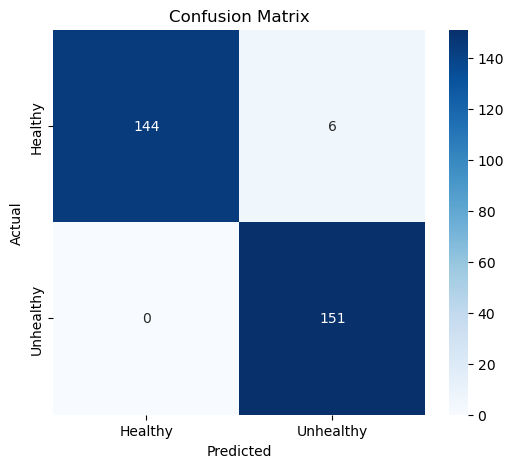

Classification Report:
              precision    recall  f1-score   support

     Healthy       1.00      0.96      0.98       150
   Unhealthy       0.96      1.00      0.98       151

    accuracy                           0.98       301
   macro avg       0.98      0.98      0.98       301
weighted avg       0.98      0.98      0.98       301



In [20]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load trained model
model_path = 'model_Adam_main.h5'  # Update with the correct model path
model = tf.keras.models.load_model(model_path)

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test_data:
    preds = model.predict(images)
    y_true.extend(labels)
    y_pred.extend(np.argmax(preds, axis=1))
    
    if len(y_true) >= test_data.samples:  # Ensure we only use test set size
        break

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Unhealthy'], yticklabels=['Healthy', 'Unhealthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute classification report
report = classification_report(y_true, y_pred, target_names=['Healthy', 'Unhealthy'])
print("Classification Report:")
print(report)


In [13]:
import pandas as pd
import numpy as np

optimizers=np.array(['SGD Optimizer','Adagrad Optimizer','Adadelta Optimizer','RMSProp Optimizer','Adam Optimizer'])
test1= np.array(['89.36%','93.68%','87.37%','80.73%','99.29%'])
testt2=np.array(['89.70%','96.01%','96.68%','82.39%','99.34%'])

df=pd.DataFrame({'Optimizers':optimizers,'Base_Paper_Accuracy':test1,'Obtained_Accuracy':testt2})
df

,Optimizers,Base_Paper_Accuracy,Obtained_Accuracy
0,SGD Optimizer,89.36%,89.70%
1,Adagrad Optimizer,93.68%,96.01%
2,Adadelta Optimizer,87.37%,96.68%
3,RMSProp Optimizer,80.73%,82.39%
4,Adam Optimizer,99.29%,99.34%


In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

def create_model():
    # Load the VGG16 model, excluding the top layers (fully connected layers)
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    # Freeze the layers in VGG16 so their weights don't get updated during training
    for layer in vgg16.layers:
        layer.trainable = False

    # Add custom layers on top of VGG16
    model = Sequential()
    model.add(vgg16)
    
    # Add custom layers
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(2, activation='softmax'))  # Adjust the output layer as per your classification task

    return model


In [17]:
def train_model(optimizer, optimizer_name):
    model = create_model()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_data,
        epochs=25,
        validation_data=test_data,
        class_weight=class_weights
    )


    loss, accuracy = model.evaluate(test_data)
    print(f'Test loss with {optimizer_name}: {loss*100:.4f}')
    print(f'Test accuracy with {optimizer_name}: {accuracy*100:.4f}')

    highest_val_accuracy = max(history.history['val_accuracy'])
    print(f'Highest Validation Accuracy with {optimizer_name}: {highest_val_accuracy * 100:.2f}%')


    model.save(f'model_{optimizer_name}.h5')
    print(f"Model saved as model_{optimizer_name}.h5")

    return history

optimizers = {
    # 'SGD': SGD(learning_rate=0.001),
    # 'Adagrad': Adagrad(learning_rate=0.01),
    # 'Adadelta': Adadelta(learning_rate=0.01),
    # 'RMSProp': RMSprop(learning_rate=0.001),
    'Adam': Adam(learning_rate=0.0001)
}

histories = {}
for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer")
    histories[opt_name] = train_model(opt, opt_name)

Training with Adam optimizer
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.5795 - loss: 0.6555 - val_accuracy: 0.6744 - val_loss: 0.5600
Epoch 2/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.7696 - loss: 0.4933 - val_accuracy: 0.6545 - val_loss: 0.5956
Epoch 3/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.7859 - loss: 0.4395 - val_accuracy: 0.7375 - val_loss: 0.5202
Epoch 4/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.8059 - loss: 0.3976 - val_accuracy: 0.6877 - val_loss: 0.5346
Epoch 5/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.8181 - loss: 0.3762 - val_accuracy: 0.7542 - val_loss: 0.4975
Epoch 6/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 306s 3s/step - accuracy: 0.8255 - loss: 0.3561 - val_accuracy: 0.7309 - val_loss: 0.5096
Epoch 7/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.8260 - loss: 0.3471 - val_accuracy: 0.6512 - val_loss: 0.7154
Epoch 8/25
102/102 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.8060 - loss: 0.3631 - val_accu

Test loss with Adam: 42.2871
Test accuracy with Adam: 78.0731
Highest Validation Accuracy with Adam: 78.07%
Model saved as model_Adam.h5
